In [1]:
Z_LENGTH = 5
NUM_LAYERS = 3
MODEL = './assets/pretrained_models/mnist/last.ckpt'
from math import *

## Define & Load Model

In [2]:
import tensorflow as tf
import numpy as np
from functools import partial

import arch
import dataset--
import wae

x_ph = tf.placeholder(tf.float32,[None,28,28,1])
z_ph = tf.placeholder(tf.float32,[None,Z_LENGTH])

ds = dataset.MNIST(1) #Given batch size is not used.

p_z = arch.Pseudo_P_Z(z_ph)

Q_arch = partial(arch.fc_arch,
                 input_shape=(784,),
                 output_size=Z_LENGTH,
                 num_layers=NUM_LAYERS,
                 embed_size=256)
G_arch = partial(arch.fc_arch,
                 input_shape=(Z_LENGTH,),
                 output_size=784, # # of generated pixels
                 num_layers=NUM_LAYERS,
                 embed_size=256)
D_arch = partial(arch.fc_arch,
                 input_shape=(Z_LENGTH,), # shape when flattened.
                 output_size=1,
                 num_layers=NUM_LAYERS,
                 embed_size=64,
                 act_fn='ELU-like')

with tf.variable_scope('param_scope') as scope:
    pass

model = \
    wae.WAE_WGAN(x_ph,
                 p_z,
                 Q_arch,
                 G_arch,
                 D_arch,
                 0.0,
                 lambda x,y: tf.reduce_sum(tf.abs(x-y),axis=(1,2,3)), #use l1_distance for recon loss
                 None,
                 scope)

init_op = tf.group(tf.global_variables_initializer(),
                   tf.local_variables_initializer())

# Execute Training!
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.InteractiveSession(config=config)

# Init variables and load weights
sess.run(init_op)
model.load(MODEL)

c:\users\nidhi\anaconda3.5\envs\gan\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


save vars:
/D/linear_0/b
/D/linear_0/w
/D/linear_1/b
/D/linear_1/w
/D/linear_2/b
/D/linear_2/w
/D/linear_3/b
/D/linear_3/w
/G/linear_0/b
/G/linear_0/w
/G/linear_1/b
/G/linear_1/w
/G/linear_2/b
/G/linear_2/w
/G/linear_3/b
/G/linear_3/w
/Q/linear_0/b
/Q/linear_0/w
/Q/linear_1/b
/Q/linear_1/w
/Q/linear_2/b
/Q/linear_2/w
/Q/linear_3/b
/Q/linear_3/w
INFO:tensorflow:Restoring parameters from ./assets/pretrained_models/mnist/last.ckpt


## Reconstruction Result

In [3]:
def draw(images):
    x,y,h,w,c = images.shape
    if c == 1:
        images = np.squeeze(images)
    
    from matplotlib import pyplot as plt
    fig = plt.figure(figsize=(y,x),dpi=150)
    
    for i in range(x):
        for j in range(y):
            a = fig.add_subplot(x,y, (i*y+j) + 1)
            a.imshow( images[i,j], cmap='gray' )
            a.axis('off')
            a.set_aspect('equal')
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()
    
valid_ims = ds.ims[50000:]

x = valid_ims[np.random.choice(len(valid_ims),20)]
recon_x = sess.run(model.x_recon, feed_dict={x_ph:x})

draw(np.stack([x,recon_x],axis=0))


<Figure size 3000x300 with 40 Axes>

In [4]:
recon_x[19].shape

(28, 28, 1)

In [5]:
def compare_images(x, recon_x):
    for i in range(20):
        xmax = 28
        ymax = 28 #img1 and img2 of same shape and size
        scale = (90/255)
        theta1 = scale*x[i]
        theta2 = scale*recon_x[i]
        img1_x = []
        img1_y = []
        img2_x = []
        img2_y = []
        summation = 0.0
        qe_norm = []
        for j in range(28):
            for k in range(28):
                img1_x.append(x[i][j][k]*cos(radians(theta1[j][k])))
                img1_y.append(x[i][j][k]*sin(radians(theta1[j][k])))
                img2_x.append(recon_x[i][j][k]*cos(radians(theta2[j][k])))
                img2_y.append(recon_x[i][j][k]*sin(radians(theta2[j][k])))
        #calculate the difference
        diff = x[i] - recon_x[i]  # elementwise for scipy arrays
        for i in range(28):
                if((fabs(img1_x[i] - img2_x[i]) > fabs(img1_y[i] - img2_y[i]))):
                    qe_norm.append([fabs(img1_x[i] - img2_x[i]) + ((sqrt(2) - 1)*fabs(img1_y[i] - img2_y[i]))])  #Quasi Euclidean formaula 

                else:
                    qe_norm.append([fabs(img1_y[i] - img2_y[i]) + ((sqrt(2) - 1)*fabs(img1_x[i] - img2_x[i]))])    

        qe_norm= np.asarray(qe_norm) #changes i made
        print(qe_norm)
        summation = sum(qe_norm)
        #summ[i] = summation
    return(summation) #changes i made


In [8]:
summ = compare_images(x,recon_x)
similarity1 = (1 - (summ/7140.0))

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [1.00253256]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [1.00253256]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

In [9]:
print ("Quasi Euclidean similarity : ",similarity1[0])

Quasi Euclidean similarity :  1.0


## Random Sampled Images

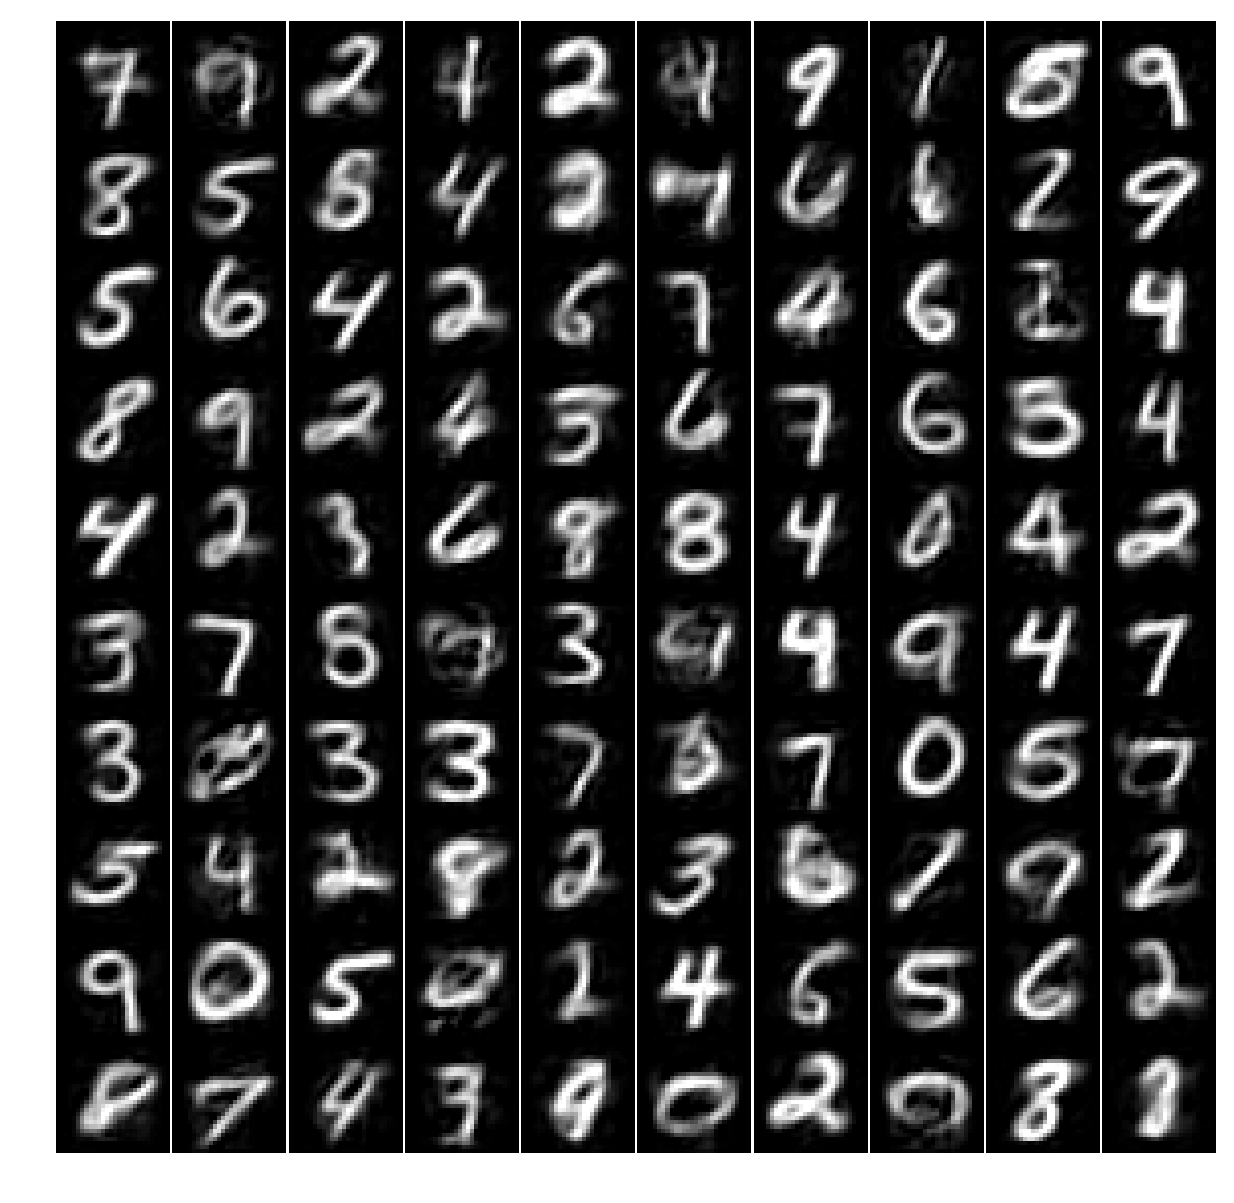

In [7]:
sampled = \
    sess.run(model.x_sample, 
         feed_dict={x_ph:np.zeros((100,28,28,1)), # Not used; just used for inferencing image shape
                    z_ph:np.random.normal(loc=0.0, scale=1.0, size=(100,Z_LENGTH))})
sampled = np.reshape(sampled,[10,10,28,28,1])
draw(sampled)

In [8]:
type(recon_x)

numpy.ndarray

In [9]:
type(x)

numpy.ndarray